#  About the Author

**👤 Name:** Muhammad Umer  
**🔗 LinkedIn:** [https://www.linkedin.com/in/therealumerhayat/](https://www.linkedin.com/in/therealumerhayat/)  
**📧 Gmail:** umerhayat282@gmail.com  
**📞 Contact Number:** +92 302 9854427 / +92 317 6239577

***

#  1. Problem Statement Business Case

In the world of mining, precision and timing are everything. Traditionally, determining the percentage of silica in iron ore concentrate has been a slow, manual process  but what if we could predict it in real time?

This project sets out to do just that: leverage deep learning to predict the percentage of silica concentrate in iron ore every minute, using historical process data. By replacing lab-based measurements with real-time predictions, mining operations can react faster, optimize processes, and improve product quality with minimal delay.

Mining giants like Freeport-McMoRan, one of the largest mining companies in the U.S., have already embraced this transformation. They've developed custom AI models trained on over three years of operational data, allowing them to make micro-adjustments in real time  increasing mill throughput, enhancing copper yield, and maintaining efficiency across the board. For example, something as simple as feeding more ore per minute can boost production when guided by data-driven insights.

Inspired by such advancements, this project aims to bring similar AI-powered prediction capabilities to the silica monitoring process  making mining smarter, faster, and more efficient.

#  2. Import Dataset and Relevent Liabraries

In [93]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv("/kaggle/input/mining-data/mining_data.csv")

In [3]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3196.680000,542.694333,396.284000,10.158367,1.668070,249.796333,250.275667,248.668000,...,250.547000,464.978667,490.450333,443.465000,442.856333,438.782333,452.248333,466.300667,67.06,1.11
1,55.2,16.98,3213.673333,540.649333,397.949333,10.156600,1.664973,249.536000,250.752000,250.968333,...,249.807000,445.001000,362.894667,442.748333,471.045333,445.239667,443.630667,426.921667,67.06,1.11
2,55.2,16.98,3180.080000,535.929333,397.305000,10.154800,1.661877,249.576000,250.279667,251.001333,...,249.686667,443.574667,478.916333,432.779333,437.401667,441.761000,490.824667,478.046667,67.06,1.11
3,55.2,16.98,3196.713333,535.102000,397.010667,10.153067,1.658780,249.380333,248.799333,250.241333,...,249.926333,440.731333,488.994000,452.461333,439.572667,434.027333,457.083667,458.815667,67.06,1.11
4,55.2,16.98,3111.723333,532.735000,395.263667,10.151300,1.655680,249.426667,252.209667,249.243333,...,249.975667,445.851667,418.860000,462.936667,454.948333,453.571667,446.831667,426.600000,67.06,1.11


In [4]:
#checking the null values in the data
df.isnull().sum()  /  len(df)

% Iron Feed                     0.0
% Silica Feed                   0.0
Starch Flow                     0.0
Amina Flow                      0.0
Ore Pulp Flow                   0.0
Ore Pulp pH                     0.0
Ore Pulp Density                0.0
Flotation Column 01 Air Flow    0.0
Flotation Column 02 Air Flow    0.0
Flotation Column 03 Air Flow    0.0
Flotation Column 04 Air Flow    0.0
Flotation Column 05 Air Flow    0.0
Flotation Column 06 Air Flow    0.0
Flotation Column 07 Air Flow    0.0
Flotation Column 01 Level       0.0
Flotation Column 02 Level       0.0
Flotation Column 03 Level       0.0
Flotation Column 04 Level       0.0
Flotation Column 05 Level       0.0
Flotation Column 06 Level       0.0
Flotation Column 07 Level       0.0
% Iron Concentrate              0.0
% Silica Concentrate            0.0
dtype: float64

In [7]:
#average percentage of Silica Concentrate
print(f"The Average percentage of Silica Concentrate: {df['% Silica Concentrate'].mean()}")
#maximumn percentage of Iron Concentrate
print(f"The Maximum percentage of iron Concentrate: {df['% Iron Concentrate'].max()}")

The Average percentage of Silica Concentrate: 2.3272283272283274
The Maximum percentage of iron Concentrate: 68.01


#  3. Data Visualization

<Axes: >

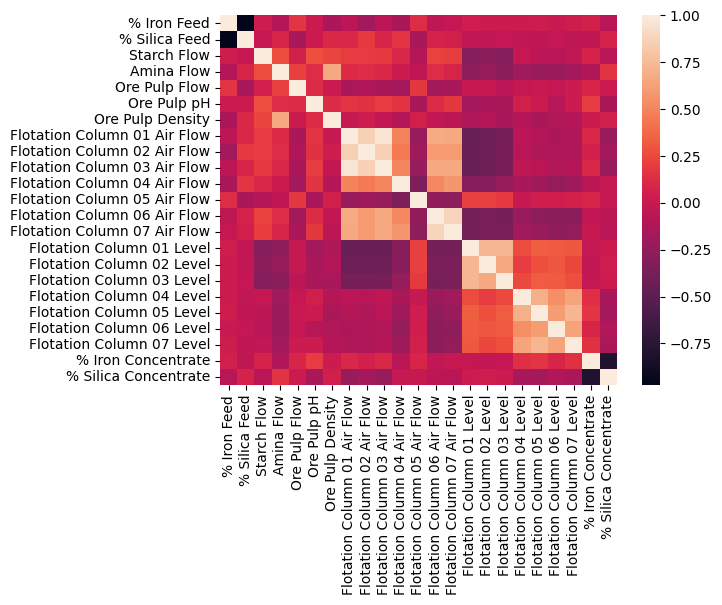

In [10]:
#checking correlation
sns.heatmap(df.corr())

we can infer that there is a relationship between iron feed and silica feed.

Also, a relationship between silica concentrate and iron concentrate.

<Axes: xlabel='% Iron Concentrate', ylabel='% Silica Concentrate'>

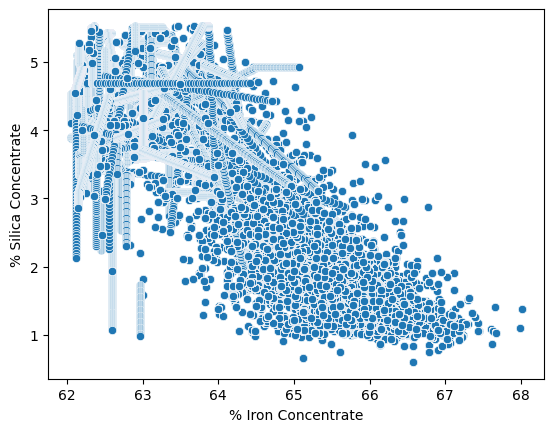

In [12]:
#lets verify the correlation with the help of scatterplot
sns.scatterplot(data=df, x="% Iron Concentrate" , y="% Silica Concentrate")

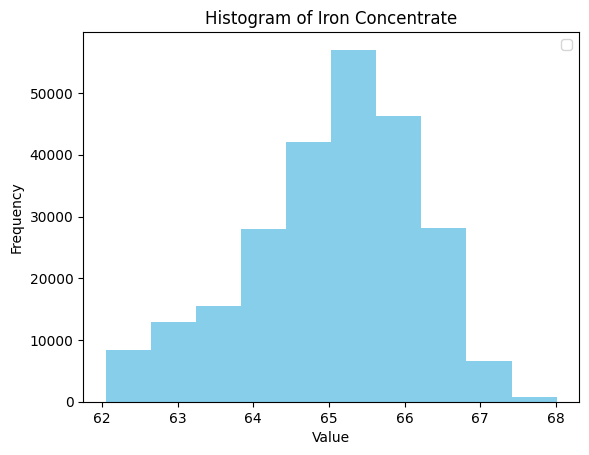

In [27]:
#lets check the skew of the dataset

# Plotting the histograms
plt.hist(df["% Iron Concentrate"], bins=10, color='skyblue')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Iron Concentrate')
plt.legend()
plt.show()

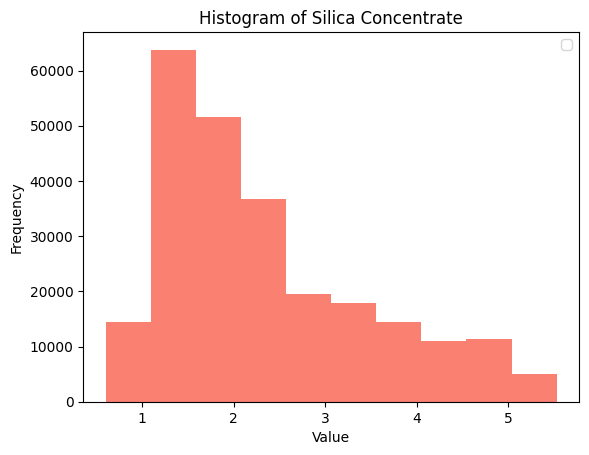

In [26]:
plt.hist(df["% Silica Concentrate"], bins=10, color='salmon')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Silica Concentrate')
plt.legend()
plt.show()

<Axes: xlabel='% Iron Feed', ylabel='% Silica Feed'>

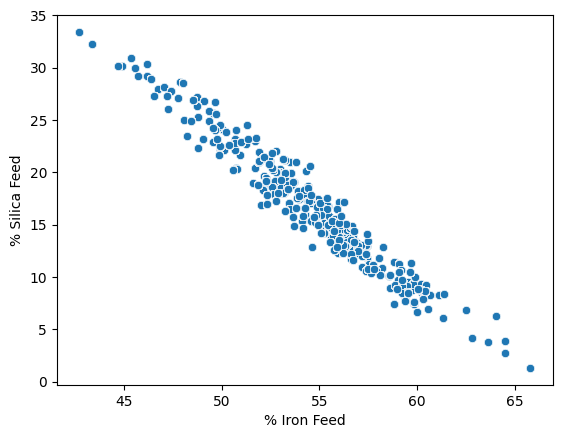

In [13]:
#lets verify the correlation with the help of scatterplot
sns.scatterplot(data=df, x="% Iron Feed" , y="% Silica Feed")

#  4. Data Preparation

In [74]:
features = df.drop(columns ="% Silica Concentrate")
target = df['% Silica Concentrate']

In [75]:
features.shape

(245700, 22)

In [76]:
target.shape

(245700,)

In [77]:
features = np.array(features)
target = np.array(target)

In [78]:
#array reshape
target = target.reshape(-1,1)
target.shape

(245700, 1)

In [79]:
x_scaler = StandardScaler()
X = x_scaler.fit_transform(features)
scaler_y = StandardScaler()
Y = scaler_y.fit_transform(target)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [81]:
print(f"% shape of the x train: {len(X_train) / len(df) * 100}.%")
print(f"% shape of the x test: {len(X_test) / len(df) * 100}.%")
print(f"% shape of the y train: {len(y_train) / len(df) * 100}.%")
print(f"% shape of the y test: {len(y_test) / len(df) * 100}.%")

% shape of the x train: 80.0.%
% shape of the x test: 20.0.%
% shape of the y train: 80.0.%
% shape of the y test: 20.0.%


#  5. Train and Evaluate simple machine learning model

In [52]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)

LinearRegression()

In [53]:
accuracy_lr = Lr.score(X_test, y_test)
accuracy_lr

0.6782372697427903

The accuracy score 67% is very low lets try a bit complex model

**Lets Train RandomForest Model**

In [56]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

accuracy_dtr = dtr.score(X_test, y_test)
accuracy_dtr

0.9831590925207871

**98% Accuracy Is Excellent Accuracy lets improve it more, lets see if we can improve**

# 6. Now we will build and train Artificial Neural with the help of tensorflow and keras to perform this regression task

In [82]:
optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)

In [83]:
#instantiate sequential container
model_ann = keras.Sequential()

In [84]:
#insert dense layer
model_ann.add(Dense(250, input_dim = 22, kernel_initializer= "normal", activation='relu'))
model_ann.add(Dense(500, activation='relu'))
#add dropout layer to avoid overfitting
model_ann.add(Dropout(0.1))
#add another dense layer with activation like before
model_ann.add(Dense(1000, activation = 'relu'))
#dropout layer
model_ann.add(Dropout(0.1))

model_ann.add(Dense(1000, activation = 'relu'))
model_ann.add(Dropout(0.1))

model_ann.add(Dense(500, activation = 'relu'))
model_ann.add(Dropout(0.1))

model_ann.add(Dense(250, activation = 'relu'))
model_ann.add(Dropout(0.1))

#add final layer with linear activation function because of regression problem 
model_ann.add(Dense(1, activation='linear'))
#compile the model
model_ann.compile(loss='mse', optimizer = 'adam')
model_ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 250)                 │           5,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │         125,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1000)                │         501,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,251 (8.62 MB)

 Trainable params: 2,259,251 (8.62 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
history  = model_ann.fit(X_train, y_train, epochs = 5, validation_split = 0.2)


Epoch 1/5
4914/4914 ━━━━━━━━━━━━━━━━━━━━ 98s 19ms/step - loss: 0.2594 - val_loss: 0.1358
Epoch 2/5
4914/4914 ━━━━━━━━━━━━━━━━━━━━ 94s 19ms/step - loss: 0.1469 - val_loss: 0.1094
Epoch 3/5
4914/4914 ━━━━━━━━━━━━━━━━━━━━ 94s 19ms/step - loss: 0.1172 - val_loss: 0.1077
Epoch 4/5
4914/4914 ━━━━━━━━━━━━━━━━━━━━ 94s 19ms/step - loss: 0.1019 - val_loss: 0.0879
Epoch 5/5
4914/4914 ━━━━━━━━━━━━━━━━━━━━ 95s 19ms/step - loss: 0.0954 - val_loss: 0.0768


In [86]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

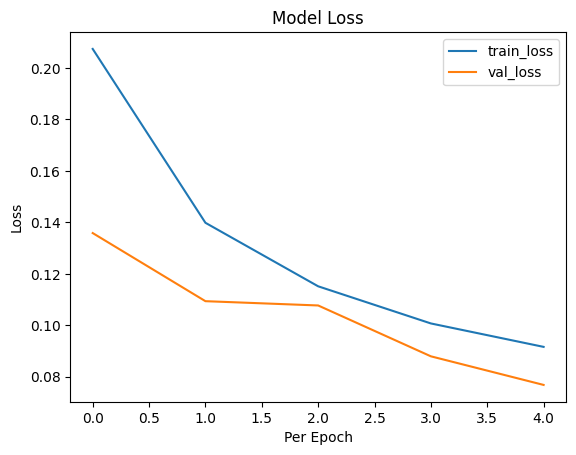

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Per Epoch')
plt.legend(['train_loss', 'val_loss'], loc = 'upper right')
plt.show()

In [88]:
result = model_ann.evaluate(X_test, y_test)
accuracy_ann = 1 - result
print("Accuracy : {}".format(accuracy_ann))

1536/1536 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0786
Accuracy : 0.9222195520997047


#  7. Compare Model Accuracies

Text(0, 0.5, 'True Values')

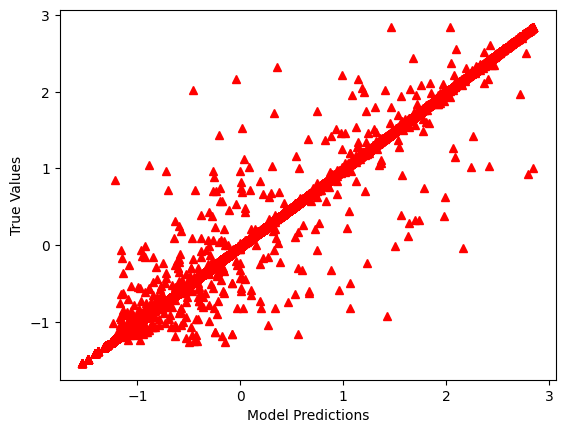

In [89]:
y_predict = dtr.predict(X_test)
plt.plot(y_predict, y_test, "^", color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

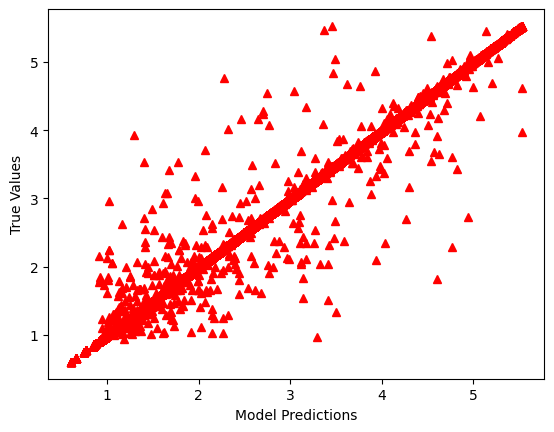

In [91]:
y_predict_original = scaler_y.inverse_transform(y_predict.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

plt.plot(y_test_original, y_predict_original, "^", color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()

In [106]:
k = X_test.shape[1]
n = len(X_test)

rmse = float(format(np.sqrt(mean_squared_error(y_test_original, y_predict_original)), '.3f'))
mse = format(mean_squared_error(y_test_original, y_predict_original), '.3f')
mae = format(mean_absolute_error(y_test_original, y_predict_original), '.3f')
r2_value = r2_score(y_test_original, y_predict_original)
r2 = format(r2_value, '.3f')
adj_r2 = 1 - (1 - r2_value) * (n - 1) / (n - k - 1)

print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score: ", r2)
print("Adjusted R²:", round(adj_r2, 3))


Root Mean Squared Error: 0.068
Mean Squared Error: 0.005
Mean Absolute Error: 0.005
R2 Score:  0.996
Adjusted R²: 0.996


**Conclusion**

In this project, I began with a simple question: can we accurately predict the percentage of silica concentrate in iron ore using machine learning?

To find the answer, I started with the most basic model  Linear Regression. It gave me a modest accuracy of 67%, setting a baseline and highlighting the limitations of assuming linear relationships in complex industrial processes.

Next, I turned to the Decision Tree Regressor. This model not only improved the accuracy dramatically to 98%, but also demonstrated excellent generalization across the data. It was a turning point  proof that even simple tree-based models can outperform more complex ones when chosen wisely.

Encouraged, I experimented with an Artificial Neural Network (ANN), aiming to push the performance further. Surprisingly, the ANN delivered a slightly lower accuracy of 92%, reminding me that more complexity doesn’t always mean better results.

This journey reinforced a valuable lesson: in machine learning, simplicity can be powerful. The Decision Tree Regressor emerged as the best performer, combining high accuracy with interpretability and efficiency  making it an ideal choice for real-world deployment in the mining industry.